<a href="https://colab.research.google.com/github/Aondona93/D-analytics/blob/main/Water_Point_Spatial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pysal #for Construction and interactive editing of spatial weights matrices & graphs
#!pip install contextily #contextily is a small package to retrieve and write to disk tile maps from the internet into geospatial raster files


In [ ]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
#import descartes
import geopandas as gpd#Libary for Geopspatial Analysis
from shapely.geometry import Point, Polygon# modules for geop analysis
from pysal.lib import weights # for weight assignment on hotspot maps
from pysal.explore import esda
from esda import getisord#for clustering
import numpy as np# for numerical analysis
from libpysal.weights import KNN # for clustering
from scipy.stats import zscore # for cluster assignments
from matplotlib.lines import Line2D # for dynamic mapping
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.colors import BoundaryNorm
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [ ]:
# Load the shapefile
gdf = gpd.read_file("/content/Nigeria_-_Water_Points.shp")
gdf.head()

,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,statename,statecode,water_typ,alt_name,name,source,geometry
0,1,7a0b763c-393c-48b8-95d2-ad539d63fe8f,105377,2018-03-01,racheal.olarewaju,None,Oguduokwo Oshiri,EBSNCA16,Onicha,11013,Ebonyi,EB,Well,None,Mr Chukwu Borehole,GRID,POINT (7.85568 6.11929)
1,2,3aa2a940-9cff-45c2-bede-7d2c2f6454bd,105378,2018-03-01,racheal.olarewaju,None,Oguduokwo Oshiri,EBSNCA16,Onicha,11013,Ebonyi,EB,Borehole,None,Ifuagangbo Owom Borehole,GRID,POINT (7.87162 6.11942)
2,3,3a0edbd8-db7b-43c7-88f7-8562b9a8a31a,105379,2018-06-06,racheal.olarewaju,None,Ngwaiyiekwe / Ward Ten,ABSGWB07,Ugwunagbo,1012,Abia,AB,Borehole,None,Amayi Borehole,GRID,POINT (7.33469 5.0065)
3,4,23d207a9-6638-4bce-b5c6-f3612ea82d87,105380,2018-06-06,racheal.olarewaju,None,Ngwaiyiekwe / Ward Ten,ABSGWB07,Ugwunagbo,1012,Abia,AB,Borehole,None,Ihie Community Solar Powered Borehole,GRID,POINT (7.30951 5.00729)
4,5,3b12320e-c709-4b7b-94df-cdb6883bf984,105381,2018-07-09,adanna.alex,None,Iloro / Efon 9,EKSEFO07,Efon,13002,Ekiti,EK,Well,None,Iya Idanre Well,GRID,POINT (4.94908 7.7272)


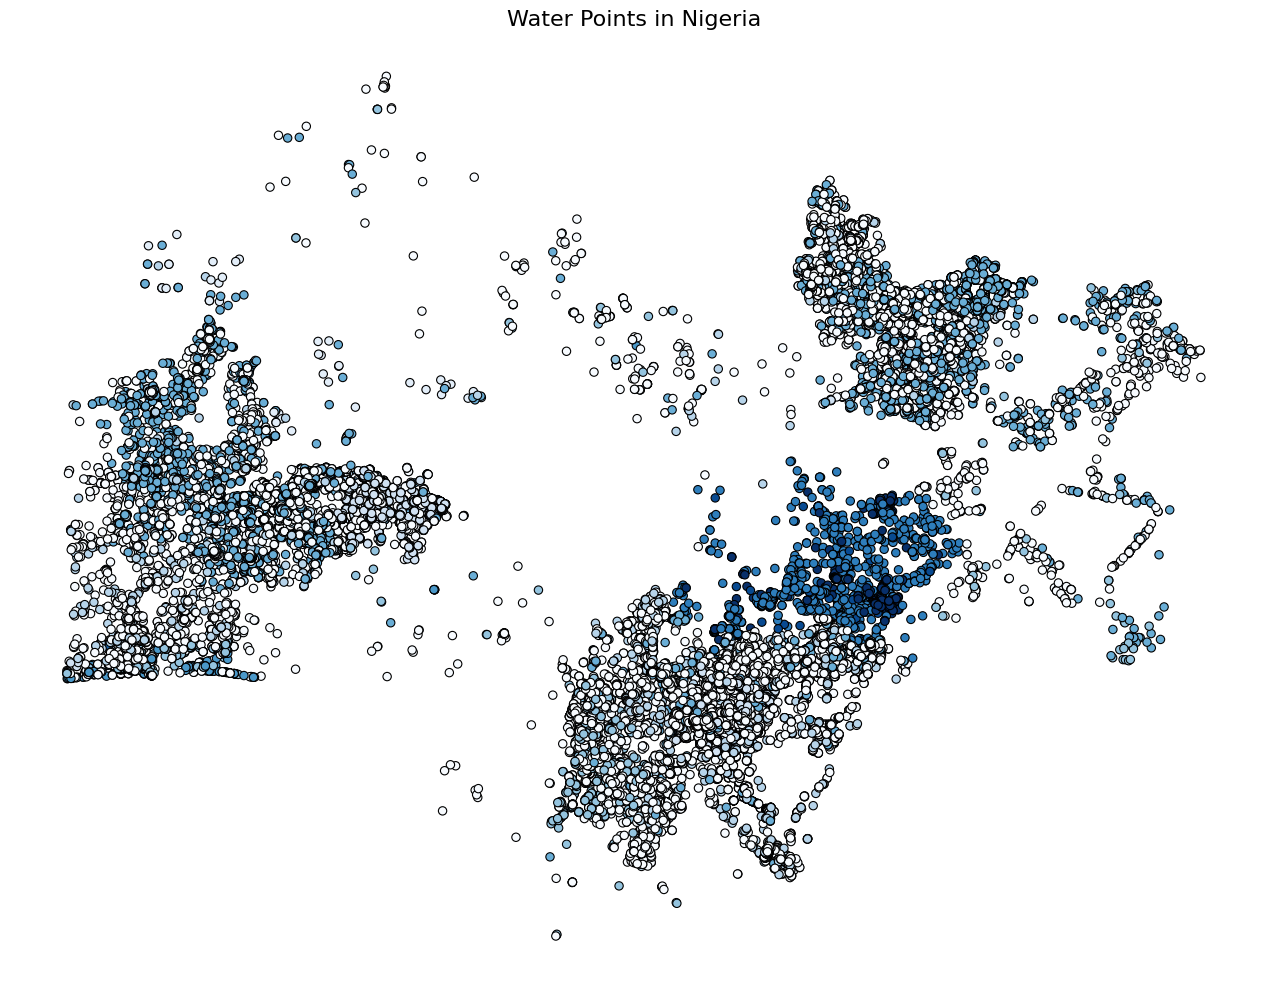

In [10]:
# Indicator to plot
indicator = 'water_typ'
title = 'Water Points in Nigeria'

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Plot map
gdf.plot(column=indicator, cmap='Blues', linewidth=0.8, edgecolor='black', ax=ax)

# Remove axes and add title
ax.axis('off')
ax.set_title(title, fontsize=16)
plt.tight_layout()
plt.show()


In [13]:
Lagos_state = gdf[gdf['statename'] == 'Lagos']
Lagos_state.head()

,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,statename,statecode,water_typ,alt_name,name,source,geometry
701,702,9105dbe9-1964-447d-90b9-6da18afb0eda,95582,2019-02-11,adanna.alex,None,Bada-Megida,LASAMO15,Alimosho,25003,Lagos,LA,Borehole,None,Borehole,GRID,POINT (3.22027 6.57692)
728,729,5a139bd6-4adb-410c-99dd-011f4cb59796,95147,2019-02-11,adanna.alex,None,Akoro,LASBDY05,Badagry,25006,Lagos,LA,Wells,None,Well 1,GRID,POINT (2.8376 6.39539)
729,730,13fd6d58-69f8-485a-919d-bafc4824bf61,95532,2019-02-11,adanna.alex,None,Owoyemi,LASATO14,Ajeromi/Ifelodun,25002,Lagos,LA,Wells,None,Charles Wells,GRID,POINT (3.32867 6.46082)
730,731,4885189b-ee20-4bcc-80ca-8d15401afdd8,95853,2019-02-11,adanna.alex,None,Egbeda,LASAMO19,Alimosho,25003,Lagos,LA,Borehole,None,Borehole 1,GRID,POINT (3.29188 6.59602)
942,943,d5285b6e-3ca0-4cdc-abd3-f50ae61a0826,95567,2019-02-11,adanna.alex,None,Igbo-Elerin,LASOJO05,Ojo,25015,Lagos,LA,Waterworks,None,Blue Tap Water,GRID,POINT (3.19699 6.46929)


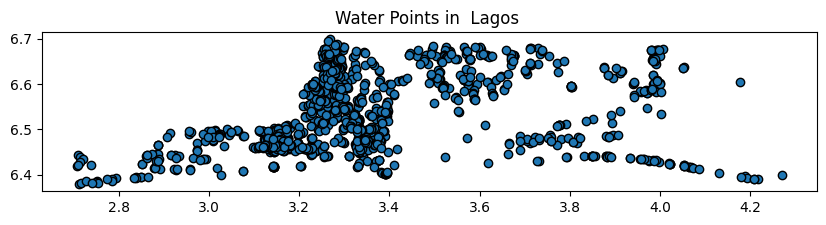

In [23]:
import matplotlib.pyplot as plt

# Plot the map
fig, ax = plt.subplots(figsize=(10, 15))
Lagos_state.plot(ax=ax, color='C10', edgecolor='black')

# Label each LGA with its name
for idx, row in Lagos_state.iterrows():
    # Get the centroid of the geometry
    centroid = row.geometry.centroid

plt.title("Water Points in  Lagos ")
plt.show()
